In [213]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, json

sns.set_palette("muted")
sns.set_context("talk")
sns.set_style("white")
pd.set_option("display.max_columns", None)

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [225]:
df.to_csv("randgen_dist.csv")

In [214]:
df = pd.read_pickle("randgen_dist.pkl")
print("# df.describe()")
display(df.describe())
print("\n# df.head()")
display(df.head())

# df.describe()


,A,B,C
count,111357.000000,111357.000000,111357.000000
mean,10.108340,13.170936,132.419908
std,3.110916,4.864470,30.116953
min,4.000196,6.000059,88.019998
25%,8.058930,10.086372,108.779999
50%,9.809747,12.098702,126.500000
75%,11.798224,14.746299,151.000000
max,20.999931,36.997408,219.979998



# df.head()


,A,B,C
0,7.844111,9.601037,105.199998
1,7.226600,17.834072,100.500000
2,8.208324,17.258219,107.500000
3,11.364779,23.253687,97.000000
4,12.998681,12.097613,93.500000


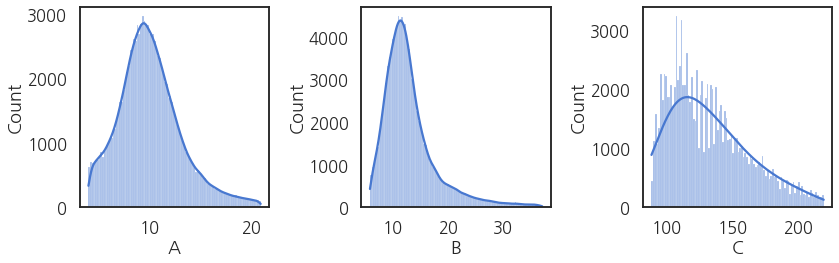

In [215]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.histplot(df["A"], ax=axs[0], kde=True, bins=100)
sns.histplot(df["B"], ax=axs[1], kde=True, bins=100)
sns.histplot(df["C"], ax=axs[2], kde=True, bins=100, kde_kws={"bw_adjust":5})
fig.tight_layout()
fig.savefig("39_randgen_dist_1.png")

* bivariate distribution

In [72]:
PCC_AB = df.corr().loc["A", "B"]
PCC_BC = df.corr().loc["B", "C"]
PCC_AC = df.corr().loc["A", "C"]
print(PCC_AB, PCC_BC, PCC_AC)

0.2813347529044316 0.025736569810035914 0.0011956781154378422


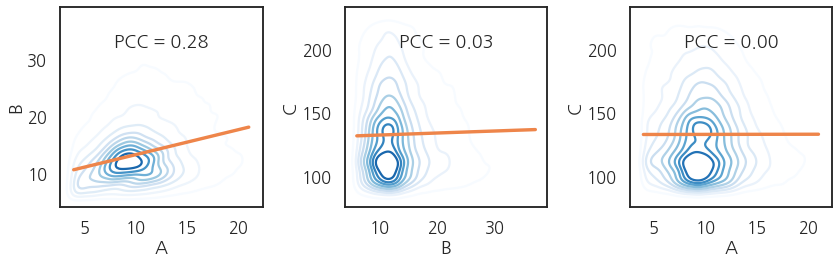

In [74]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.kdeplot(x=df["A"], y=df["B"], cmap="Blues", ax=axs[0])
sns.regplot(x=df["A"], y=df["B"], scatter=False, ax=axs[0])
axs[0].annotate(f"PCC = {PCC_AB:0.2f}", (0.5, 0.8), xycoords='axes fraction', ha="center")

sns.kdeplot(x=df["B"], y=df["C"], cmap="Blues", ax=axs[1])
sns.regplot(x=df["B"], y=df["C"], scatter=False, ax=axs[1])
axs[1].annotate(f"PCC = {PCC_BC:0.2f}", (0.5, 0.8), xycoords='axes fraction', ha="center")

sns.kdeplot(x=df["A"], y=df["C"], cmap="Blues", ax=axs[2])
sns.regplot(x=df["A"], y=df["C"], scatter=False, ax=axs[2])
axs[2].annotate(f"PCC = {PCC_AC:0.2f}", (0.5, 0.8), xycoords='axes fraction', ha="center")

fig.tight_layout()
fig.savefig("39_randgen_dist_2.png")

* curve fitting : exp + gaussian
> https://riptutorial.com/scipy/example/31081/fitting-a-function-to-data-from-a-histogram

In [78]:
from scipy.optimize import curve_fit

def fit_lingau(x, a, b, B, mu, sigma):
    func_lin = a * x + b
    func_gaussian = B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2))
    return func_lin + func_gaussian

In [129]:
def fit_lingaugau(x, a, b, A, muA, sigmaA, B, muB, sigmaB):
    func_lin = a * x + b
    func_gaussian1 = A * np.exp(-1.0 * (x - muA)**2 / (2 * sigmaA**2))
    func_gaussian2 = B * np.exp(-1.0 * (x - muB)**2 / (2 * sigmaB**2))
    return func_lin + func_gaussian1 + func_gaussian2

In [86]:
# histogram of A
counts_A, bins_A = np.histogram(df["A"], bins=100)
bins_Ac = np.array([bins_A[i]*0.5 + bins_A[i+1]*0.5 for i in range(len(counts_A))])

In [87]:
# fit for histogram of A
popt_A, pcov_A = curve_fit(fit_lingau, xdata=bins_Ac, ydata=counts_A,
                           p0=[-20.0, 500.0, 3000.0, 10.0, 3.0])

In [88]:
xa_new = np.linspace(df["A"].min(), df["A"].max(), 100)

In [89]:
# histogram of B
counts_B, bins_B = np.histogram(df["B"], bins=100)
bins_Bc = np.array([bins_B[i]*0.5 + bins_B[i+1]*0.5 for i in range(len(counts_B))])

In [90]:
# fit for histogram of B
popt_B, pcov_B = curve_fit(fit_lingau, xdata=bins_Bc, ydata=counts_B,
                           p0=[-20.0, 500.0, 4000.0, 15.0, 3.0])

In [91]:
xb_new = np.linspace(df["B"].min(), df["B"].max(), 100)

In [112]:
# histogram of C
counts_C, bins_C = np.histogram(df["C"], bins=100)
bins_Cc = np.array([bins_C[i]*0.5 + bins_C[i+1]*0.5 for i in range(len(counts_C))])

In [113]:
# fit for histogram of C
popt_C, pcov_C = curve_fit(fit_lingau, xdata=bins_Cc, ydata=counts_C,
                           p0=[-5.0, 1000.0, 2000.0, 120.0, 20.0])

In [134]:
# fit for histogram of C
popt_C, pcov_C = curve_fit(fit_lingaugau, xdata=bins_Cc, ydata=counts_C,
                           p0=[-5.0, 1000.0, 1000.0, 120.0, 10.0, 1000.0, 150.0, 10.0])

In [135]:
xc_new = np.linspace(df["C"].min(), df["C"].max(), 100)

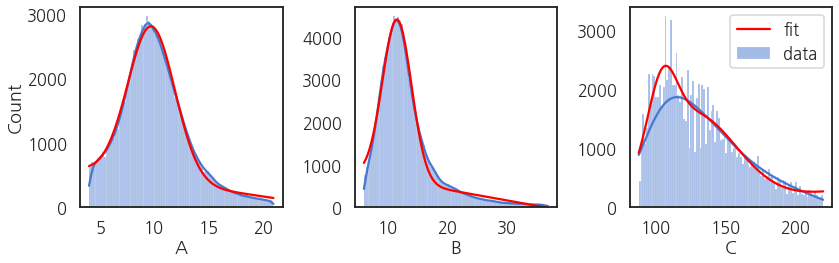

In [203]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

# A
sns.histplot(df["A"], ax=axs[0], kde=True, bins=100)
axs[0].plot(xa_new, fit_lingau(xa_new, *popt_A), c="r")
# B
sns.histplot(df["B"], ax=axs[1], kde=True, bins=100)
axs[1].plot(xb_new, fit_lingau(xb_new, *popt_B), c="r")
axs[1].set_ylabel("")
axs[1].set_ylim(0,)

# C
sns.histplot(df["C"], ax=axs[2], kde=True, bins=100, kde_kws={"bw_adjust":5}, label="data")
axs[2].plot(xc_new, fit_lingaugau(xc_new, *popt_C), c="r", label="fit")
axs[2].set_ylabel("")
axs[2].set_ylim(0,)

axs[2].legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig("39_randgen_dist_3.png")

In [223]:
A = [1, 2, 3]
p = [0, 0, 1]

np.random.choice(A, 10, p=p)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [220]:
def gen_data(x, fit_func, fit_param, number):
    prob_ = fit_func(x, *fit_param)
    prob_ = np.array([p if p>0 else 0 for p in prob_])
    prob = prob_/prob_.sum()
    return np.random.choice(x, number, p=prob)

In [197]:
gen_A = gen_data(xa_new, fit_lingau, popt_A, 10000)
gen_B = gen_data(xb_new, fit_lingau, popt_B, 10000)
gen_C = gen_data(xc_new, fit_lingaugau, popt_C, 10000)

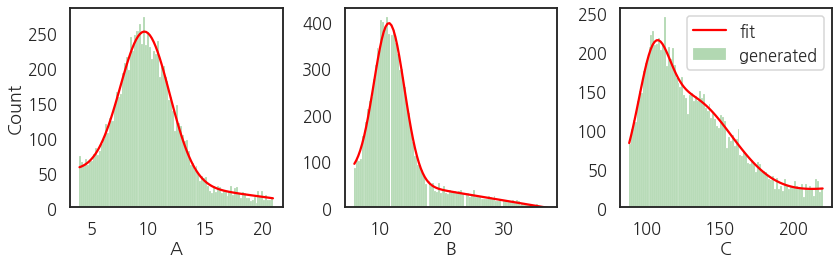

In [204]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

# A
sns.histplot(gen_A, bins=100, ax=axs[0], color="green", alpha=0.3)
axs[0].plot(xa_new, fit_lingau(xa_new, *popt_A)/df.shape[0]*10000, c="r")
# B
sns.histplot(gen_B, bins=100, ax=axs[1], color="green", alpha=0.3)
axs[1].plot(xb_new, fit_lingau(xb_new, *popt_B)/df.shape[0]*10000, c="r")
# C
sns.histplot(gen_C, bins=100, ax=axs[2], color="green", alpha=0.3, label="generated")
axs[2].plot(xc_new, fit_lingaugau(xc_new, *popt_C)/df.shape[0]*10000, c="r", label="fit")

xlabels=["A", "B", "C"]
for i in range(3):
    axs[i].set_xlabel(xlabels[i])
    axs[i].set_ylim(0,)
    if i != 0:
        axs[i].set_ylabel("")

axs[2].legend(bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig("39_randgen_dist_4.png")

In [208]:
df_gen = pd.DataFrame({"A":gen_A, "B":gen_B, "C": gen_C})
gen_corr = df_gen.corr()
gen_corr

,A,B,C
A,1.00000,0.002420,-0.011220
B,0.00242,1.000000,0.006007
C,-0.01122,0.006007,1.000000


* bivariate distribution

In [209]:
gen_PCC_AB = df_gen.corr().loc["A", "B"]
gen_PCC_BC = df_gen.corr().loc["B", "C"]
gen_PCC_AC = df_gen.corr().loc["A", "C"]
print(gen_PCC_AB, gen_PCC_BC, gen_PCC_AC)

0.0024199302542169893 0.00600673952490592 -0.01121995386816618


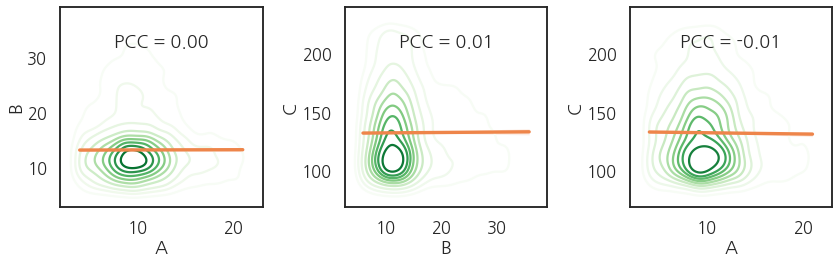

In [210]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.kdeplot(x=df_gen["A"], y=df_gen["B"], cmap="Greens", ax=axs[0])
sns.regplot(x=df_gen["A"], y=df_gen["B"], scatter=False, ax=axs[0])
axs[0].annotate(f"PCC = {gen_PCC_AB:0.2f}", (0.5, 0.8), xycoords='axes fraction', ha="center")

sns.kdeplot(x=df_gen["B"], y=df_gen["C"], cmap="Greens", ax=axs[1])
sns.regplot(x=df_gen["B"], y=df_gen["C"], scatter=False, ax=axs[1])
axs[1].annotate(f"PCC = {gen_PCC_BC:0.2f}", (0.5, 0.8), xycoords='axes fraction', ha="center")

sns.kdeplot(x=df_gen["A"], y=df_gen["C"], cmap="Greens", ax=axs[2])
sns.regplot(x=df_gen["A"], y=df_gen["C"], scatter=False, ax=axs[2])
axs[2].annotate(f"PCC = {gen_PCC_AC:0.2f}", (0.5, 0.8), xycoords='axes fraction', ha="center")

fig.tight_layout()
fig.savefig("39_randgen_dist_5.png")